# Fragile Families Challenge
## Onur Varol
@onurvarol | www.onurvarol.com

In [1]:
%pylab inline
import os, sys, glob, copy
import gzip

import json
import pickle

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.manifold import TSNE
from sklearn import linear_model

from data_access import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
featureDefinitions = get_feature_name_definitions()
featureList = get_feature_list()
print len(featureList)
#print featureList

12942


# of features: 12942
# of core features: 9840
hv3m20_ 4242 
m3natwtx_rep20 4242 Mother three-year national replicate weight no. 20 (excluding one city)
m3natwtx_rep21 4242 Mother three-year national replicate weight no. 21 (excluding one city)
m3natwtx_rep22 4242 Mother three-year national replicate weight no. 22 (excluding one city)
m3natwtx_rep23 4242 Mother three-year national replicate weight no. 23 (excluding one city)
m3natwtx_rep24 4242 Mother three-year national replicate weight no. 24 (excluding one city)
c2natwtx_rep17 4242 Couple one-year national replicate weight no. 17 (excluding one city)
m3natwtx_rep26 4242 Mother three-year national replicate weight no. 26 (excluding one city)
m3natwtx_rep27 4242 Mother three-year national replicate weight no. 27 (excluding one city)
m2natwtx_rep24 4242 Mother one-year national replicate weight no. 24 (excluding one city)
ffcc_famsurvey_a17a_9ot 4242 
m2natwtx_rep27 4242 Mother one-year national replicate weight no. 27 (excluding one ci

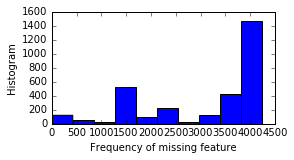

In [8]:
# Count which features are mostly missing
#'''
coreFeatures = set(get_feature_list())
featureMissing = dict()
for uid, feat in iterate_user_background_features():
    for f in featureList:
        if f not in feat:
            if f not in featureMissing:
                featureMissing[f] = 0
            featureMissing[f] += 1
    coreFeatures = coreFeatures & set(feat)
    
print '# of features: {}'.format(len(featureList))
print '# of core features: {}'.format(len(coreFeatures))
#'''

for f in sorted(featureMissing, key=featureMissing.get, reverse=True)[:100]:
    print f, featureMissing[f], featureDefinitions.get(f, '')
    
plt.figure(figsize=(4,2))
plt.hist(featureMissing.values())
plt.ylabel('Histogram')
plt.xlabel('Frequency of missing feature')